In [1]:
%matplotlib inline
import numpy as np
from matplotlib import collections  as mc
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import imageio
import os
import matplotlib.colors as mcolors

In [2]:
def plot_points(x,y,b,ax=None,scale=True):
    if not ax:
        fig,ax = plt.subplots(figsize = (10,10))#,facecolor='k')
    ax.plot(x,y,color='w',linewidth=1)
    ax.set_facecolor('k')
    if scale:
        x_c,y_c = ((x.max()+x.min())/2,(y.max()+y.min())/2)
        d = max((x.max()-x.min())*(1+b),(y.max()-y.min())*(1+b))/2
    
        ax.set_xlim(x_c-d,x_c+d)
        ax.set_ylim(y_c-d,y_c+d)

In [3]:
def create_circle(x_o,y_o,r,n,phase=0):
    theta = np.linspace(phase, phase+2*np.pi, n)
    x = x_o + r*np.cos(theta)
    y = y_o + r*np.sin(theta)
    return (x,y)

In [4]:
x_c1,y_c1 = create_circle(0,0,1,50)

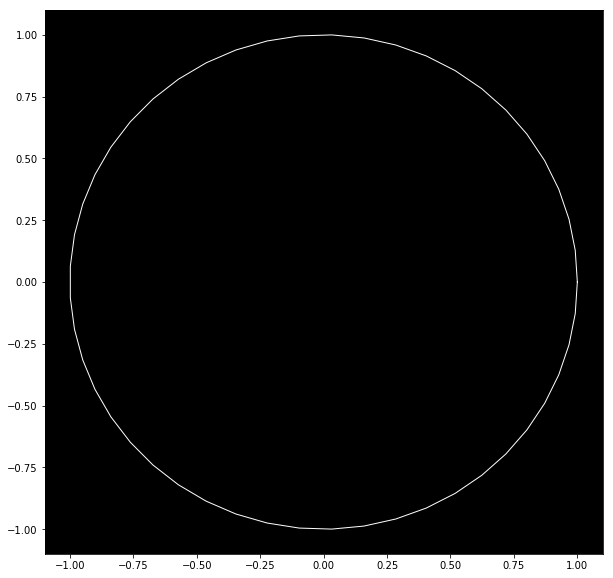

In [5]:
plot_points(x_c1,y_c1,0.1)

In [6]:
def create_log_spiral(x_o,y_o,a,k,n,rot):
    theta = np.linspace(0, 2*np.pi*rot, n)
    r = a*np.exp(k*theta)
    x = x_o + r*np.cos(theta)
    y = y_o + r*np.sin(theta)
    return (x,y)

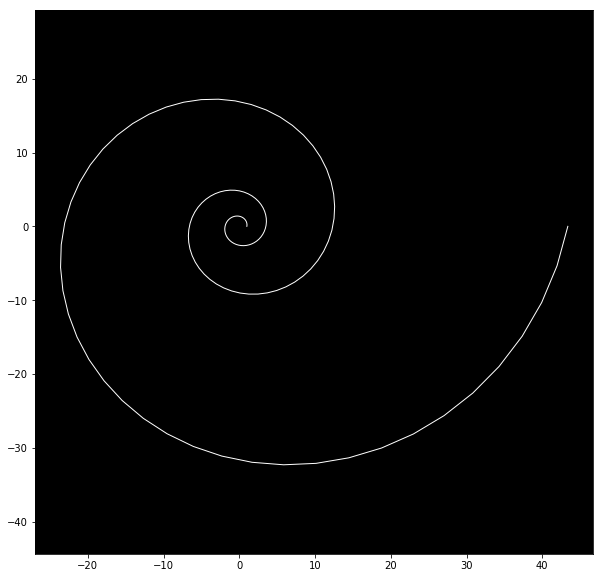

In [7]:
x_ls1,y_ls1 = create_log_spiral(0,0,1,0.2,150,3)
plot_points(x_ls1,y_ls1,0.1)

In [8]:
np.dot([1,1],[[2,1],[3,2]])

array([5, 3])

In [9]:
np.linalg.norm([4,3],2)

5.0

In [10]:
np.array([[1,1]]).shape

(1, 2)

In [11]:
def rot_angle(x,y,x_centre,y_centre):
    return np.dot([x_centre,y_centre],[x,y])/(np.linalg.norm([x_centre,y_centre],2)*np.linalg.norm([x,y],2))

In [12]:
def create_spiralling_circles(x_o,y_o,phase,a,k,n_ls,rot,r_scale,n_c):
    
    x_ls,y_ls = create_log_spiral(x_o,y_o,a,k,n_ls,rot)
    r = np.sqrt((x_ls-x_o)**2 + (y_ls-y_o)**2)
    d=0
    all_df = pd.DataFrame()
    for i in range(n_ls):
        x_c,y_c = create_circle(x_ls[i],y_ls[i],r_scale*r[i],n_c,phase)
        df_i = pd.DataFrame({'x':x_c,'y':y_c,'i':i,'r_c':r[i]})
        df_i['rot_angle'] = -(np.matmul([[x_ls[i],y_ls[i]]],np.array([x_c,y_c]))/(np.linalg.norm([x_ls[i],y_ls[i]],2)*np.linalg.norm([x_c,y_c],2,axis=0))).T
        all_df = all_df.append(df_i)
#         all_df['rot_angle'] = all_df.apply(lambda row: rot_angle(row.x,row.y,x_ls[i],y_ls[i]), axis=1)        
    
    all_df['r'] = np.sqrt(all_df['x']**2 + all_df['y']**2)
    all_df['r2'] = (all_df['x']**2 + all_df['y']**2)
    all_df['phase'] = phase
    

    return all_df

In [13]:
#         d = max((x_c.max()-x_o),(x_o-x_c.min()),(y_c.max()-y_o),(y_o-y_c.min()),d)
#         ax.plot(x_c,y_c,color='w',linewidth=1)
#         ax.plot(x_c,y_c,'o',color='w',markersize=1)
#         ax.plot(x_c,y_c,color='w', marker='o', linestyle='dashed',linewidth=1, markersize=1)
#         ax.scatter(x_c,y_c,s=1,alpha=0.5)

In [14]:
df_sc1 = create_spiralling_circles(x_o=0,y_o=0,phase=0,
                        a=0.01,k=0.1,n_ls=100,rot=10,
                        r_scale=0.9,n_c=100
                       )

In [15]:
def plot_scatter(df_sc,x_o,y_o,min_size=0,max_size=1,b=1,ax=None,**kwargs):
    d = max(((df_sc['x']-x_o).abs().max()),((df_sc['y']-y_o).abs().max()))
    return_fig=False
    if not ax:
        fig,ax = plt.subplots(figsize = (20,20))
        return_fig=True
    sns.scatterplot(data=df_sc,
                    x='x',
                    y='y',
                    sizes=(min_size,max_size),
                    ax=ax,
                    legend=False,
                    edgecolor='none',
                    **kwargs
                   )

    ax.set_facecolor('k')    
    ax.set_xlim(x_o-d*(1+b),x_o+d*(1+b))
    ax.set_ylim(y_o-d*(1+b),y_o+d*(1+b))
    ax.axes.xaxis.set_visible(False)
    ax.axes.yaxis.set_visible(False)
    if return_fig:
        return fig,ax
    else:
        return ax
    

Wall time: 228 ms


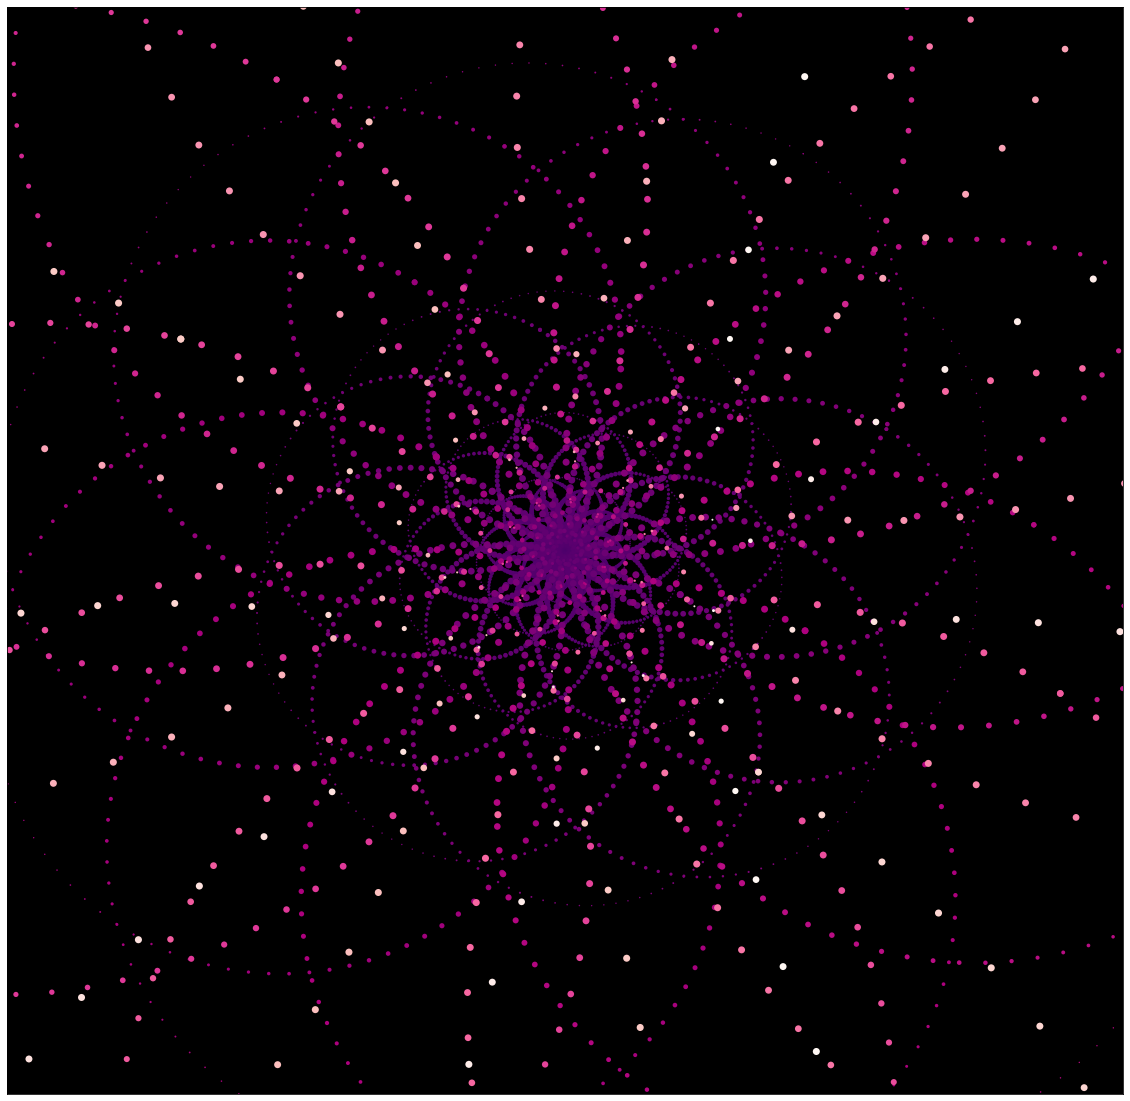

In [117]:
%%time
df_sc = create_spiralling_circles(x_o=0,y_o=0,phase=1,
                    a=0.01,k=0.1,n_ls=100,rot=10,
                    r_scale=0.9,n_c=90)
fig,ax = plot_scatter(df_sc,
                             x_o=0,y_o=0,
                             min_size=2,max_size=50,
                    b=-0.8,size='rot_angle',hue='r_c',palette='RdPu_r')

In [133]:
list(mcolors.CSS4_COLORS)

['aliceblue',
 'antiquewhite',
 'aqua',
 'aquamarine',
 'azure',
 'beige',
 'bisque',
 'black',
 'blanchedalmond',
 'blue',
 'blueviolet',
 'brown',
 'burlywood',
 'cadetblue',
 'chartreuse',
 'chocolate',
 'coral',
 'cornflowerblue',
 'cornsilk',
 'crimson',
 'cyan',
 'darkblue',
 'darkcyan',
 'darkgoldenrod',
 'darkgray',
 'darkgreen',
 'darkgrey',
 'darkkhaki',
 'darkmagenta',
 'darkolivegreen',
 'darkorange',
 'darkorchid',
 'darkred',
 'darksalmon',
 'darkseagreen',
 'darkslateblue',
 'darkslategray',
 'darkslategrey',
 'darkturquoise',
 'darkviolet',
 'deeppink',
 'deepskyblue',
 'dimgray',
 'dimgrey',
 'dodgerblue',
 'firebrick',
 'floralwhite',
 'forestgreen',
 'fuchsia',
 'gainsboro',
 'ghostwhite',
 'gold',
 'goldenrod',
 'gray',
 'green',
 'greenyellow',
 'grey',
 'honeydew',
 'hotpink',
 'indianred',
 'indigo',
 'ivory',
 'khaki',
 'lavender',
 'lavenderblush',
 'lawngreen',
 'lemonchiffon',
 'lightblue',
 'lightcoral',
 'lightcyan',
 'lightgoldenrodyellow',
 'lightgray',
 

In [16]:
# a,k,n_ls,rot,r_scale,n_c
# sns.scatterplot(x=random_array_2[:,0],
#                 y=random_array_2[:,1],
#                 ax=ax,
#                 legend=False,
#                 s=2,
#                 alpha=0.2,
#                 color='r'
#                )
def save_frames(name,frames,origin,
                   create_pts_func,create_pts_params,
                   plot_params,
                   create_noise_func=None,create_noise_params=None,
                   noise_once_flag=True,noise_plot_params=None
                  ):
    x_o,y_o = origin
    create_noise_flag = False
    if create_noise_func:
        create_noise_flag = True
    
    
    pics_path = f'pics/{name}/'
    if not os.path.isdir(pics_path):
        os.mkdir(pics_path)
    filenames = []
    for f in range(frames):
        print(f'rendering frame {f+1} out of {frames}')
        phase = (f/frames)*(2*np.pi/create_pts_params['n_c'])
        
        #plotting the shape scatter
        df_pts = create_pts_func(x_o,y_o,phase,**create_pts_params)
        fig,ax = plot_scatter(df_pts,x_o,y_o,**plot_params)
        
        # plotting noise scatter
        if create_noise_flag:
            if noise_once_flag:
                create_noise_flag=False
            noise_df_list,noise_color_list = create_noise_func(x_o,y_o,df_pts,**create_noise_params)
        
        if create_noise_func:
            for n in range(len(noise_df_list)):
                ax = plot_scatter(noise_df_list[n],
                                  x_o,y_o,
                                  marker_size=None,ax=ax,
                                  color=noise_color_list[n],b=plot_params['b'],
                                  **noise_plot_params
                                 )
        
        fig.savefig(pics_path+f'plot_{f}.png',bbox_inches='tight',pad_inches=0,dpi='figure')
        plt.close(fig)
        filenames.append(pics_path+f'plot_{f}.png')
    return filenames

# def save_sc_frames(path,frames,x_o,y_o,a,k,n_ls,rot,r_scale,n_c,max_size,b):
#     pics_path = f'pics/{name}/'
#     if not os.path.isdir(pics_path):
#         os.mkdir(pics_path)
#     filenames = []
#     for f in range(frames):
#         print(f'rendering frame {f+1} out of {frames}')
#         phase = (f/frames)*(2*np.pi/n_c)
#         df_sc = create_spiralling_circles(x_o,y_o,a,k,n_ls,rot,r_scale,phase,n_c)
#         fig,ax = plot_spiral_circles(df_sc,x_o,y_o,max_size,b)
#         fig.savefig(path+f'plot_{f}.png',bbox_inches='tight',pad_inches=0,dpi='figure')
#         plt.close(fig)
#         filenames.append(path+f'plot_{f}.png')
#     return filenames

In [174]:
# # fig.savefig('pics/spiral_circles_1/plot_0.png',bbox_inches='tight',pad_inches=0)
# save_sc_frames(x_o=0,y_o=0,
#                a=0.01,k=0.1,n_ls=100,rot=10,
#                r_scale=0.9,n_c=90,
#                b=-0.8,
#                frames=60,
#                path='pics/spiral_circles_1/'
#               )

In [18]:
#     pics_filenames = save_sc_frames(x_o,y_o,a,k,n_ls,rot,r_scale,n_c,max_size,b,frames,pics_path)
def create_gif(pics_filenames,frames,name):
    with imageio.get_writer(f'gifs/{name}.gif', mode='I',duration=1/frames) as writer:
        for filename in pics_filenames:
            image = imageio.imread(filename)
            writer.append_data(image)
    print("GIF saved")

In [17]:
# pics_filenames = save_sc_frames(x_o,y_o,a,k,n_ls,rot,r_scale,n_c,max_size,b,frames,pics_path)
sc_params_1 = {'a':0.01,'k':0.1,'n_ls':100,'rot':10,'r_scale':0.9,'n_c':90}

In [199]:
plot_params_1 = {'min_size':0,'max_size':2,'b':-0.8}

pics_filenames_1 = save_frames(name='spiral_circles_1',frames=60,
                                  origin=(0,0),
                                  create_pts_func=create_spiralling_circles,create_pts_params=sc_params_1,
                                  plot_params=plot_params_1,
                                  create_noise_func=None,create_noise_params=None,
                                  noise_once_flag=True,noise_plot_params=None
                                 )
create_gif(pics_filenames_1,
           frames=60,
           name='spiral_circles_1'
          )

rendering frame 1 out of 60
rendering frame 2 out of 60
rendering frame 3 out of 60
rendering frame 4 out of 60
rendering frame 5 out of 60
rendering frame 6 out of 60
rendering frame 7 out of 60
rendering frame 8 out of 60
rendering frame 9 out of 60
rendering frame 10 out of 60
rendering frame 11 out of 60
rendering frame 12 out of 60
rendering frame 13 out of 60
rendering frame 14 out of 60
rendering frame 15 out of 60
rendering frame 16 out of 60
rendering frame 17 out of 60
rendering frame 18 out of 60
rendering frame 19 out of 60
rendering frame 20 out of 60
rendering frame 21 out of 60
rendering frame 22 out of 60
rendering frame 23 out of 60
rendering frame 24 out of 60
rendering frame 25 out of 60
rendering frame 26 out of 60
rendering frame 27 out of 60
rendering frame 28 out of 60
rendering frame 29 out of 60
rendering frame 30 out of 60
rendering frame 31 out of 60
rendering frame 32 out of 60
rendering frame 33 out of 60
rendering frame 34 out of 60
rendering frame 35 out 

In [177]:
# create_gif(x_o=0,y_o=0,
#            a=0.01,k=0.1,n_ls=100,rot=10,
#            r_scale=1,n_c=60,
#            max_size=4,b=-0.5,
#            frames=60,
#            name='spiral_circles_2'
#           )

In [178]:
# create_gif(x_o=0,y_o=0,
#            a=0.01,k=0.1,n_ls=100,rot=10,
#            r_scale=1.6,n_c=60,
#            max_size=8,b=-0.5,
#            frames=60,
#            name='spiral_circles_3'
#           )

In [179]:
# create_gif(x_o=0,y_o=0,
#            a=0.01,k=0.01,n_ls=200,rot=10,
#            r_scale=1.6,n_c=30,
#            max_size=8,b=-0.5,
#            frames=60,
#            name='spiral_circles_4'
#           )

In [180]:
# create_gif(x_o=0,y_o=0,
#            a=0.01,k=0.02,n_ls=200,rot=10,
#            r_scale=0.6,n_c=30,
#            max_size=6,b=-0.5,
#            frames=60,
#            name='spiral_circles_5'
#           )

In [183]:
# fig,ax = plot_spiral_circles(x_o=0,y_o=0,
#            a=0.01,k=0.5,n_ls=200,rot=10,
#            r_scale=0.6,phase=0,n_c=30,
#            max_size=6,b=-0.5)


In [182]:
# create_gif(x_o=0,y_o=0,
#            a=0.01,k=0.5,n_ls=200,rot=10,
#            r_scale=0.6,n_c=30,
#            max_size=6,b=-0.5,
#            frames=60,
#            name='spiral_circles_6'
#           )

### Adding noise

In [15]:
rng = np.random.default_rng(1248)

In [16]:
random_array_1 = rng.multivariate_normal(mean=np.array([2,1]),cov=np.array([[2,0.02],[0.02,0.5]]),size=10000)
random_array_2 = rng.multivariate_normal(mean=np.array([-2,-0.3]),cov=np.array([[1,0.05],[0.05,1.2]]),size=10000)
random_array_3 = rng.multivariate_normal(mean=np.array([-0.4,2]),cov=np.array([[4,0.01],[0.01,5]]),size=10000)

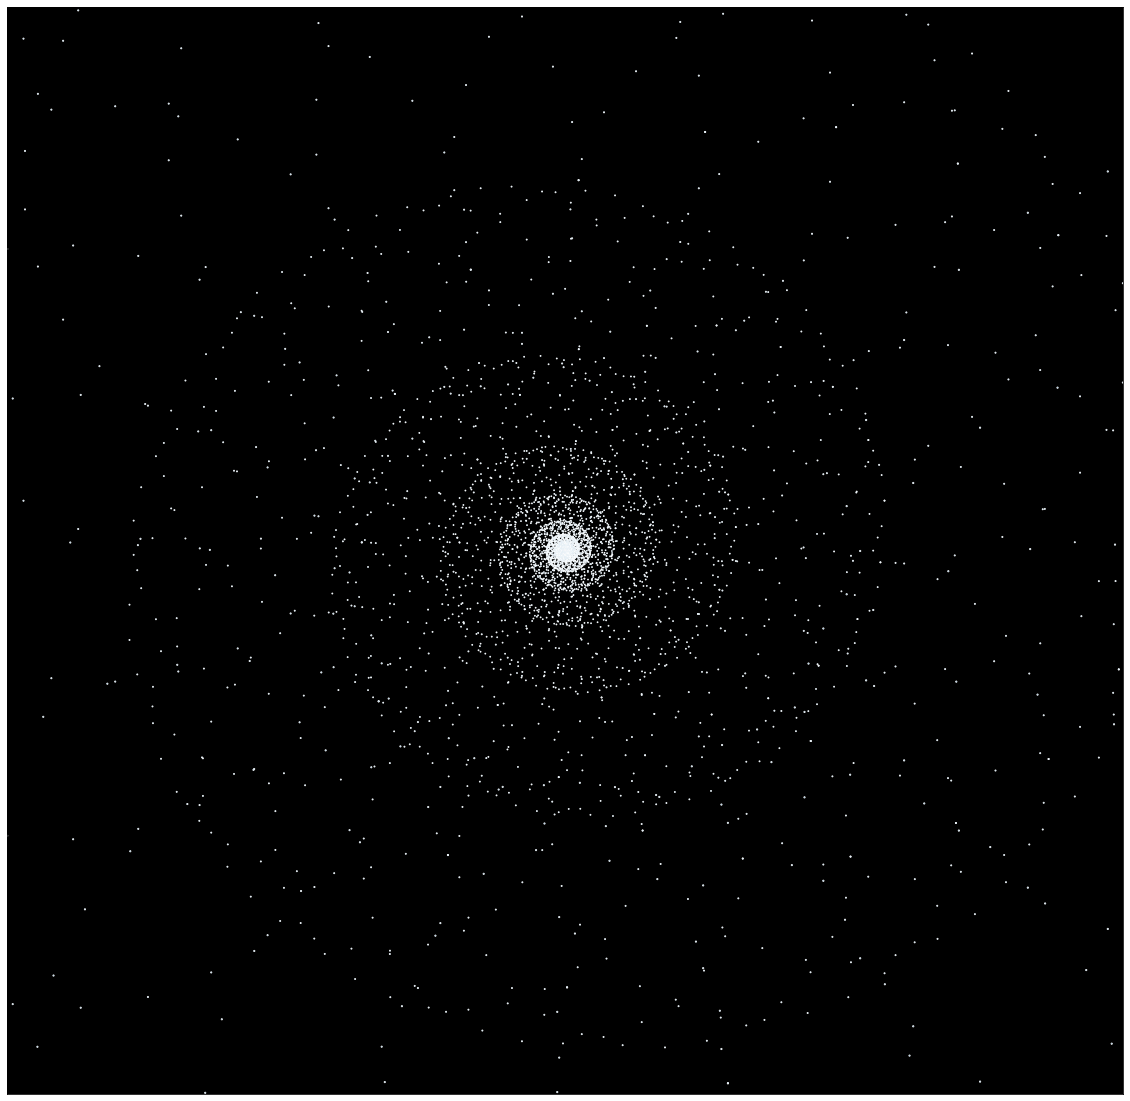

In [17]:
# fig,ax = plot_spiral_circles(x_o=0,y_o=0,
#            a=0.01,k=0.1,n_ls=200,rot=10,
#            r_scale=0.6,phase=0,n_c=30,
#            max_size=6,b=-0.5)

df_sc,marker_size = create_spiralling_circles(x_o=0,y_o=0,phase=0,
                                              a=0.01,k=0.1,n_ls=200,rot=10,
                                              r_scale=0.6,n_c=30)
fig,ax = plot_scatter(df_sc,
                             x_o=0,y_o=0,
                             marker_size=marker_size,min_size=1,max_size=2,
                    b=-0.5)

In [18]:
sns.scatterplot(x=random_array_1[:,0],
                y=random_array_1[:,1],
                ax=ax,
                legend=False,
                s=2,
                alpha=0.2,
                color='g'
               )
sns.scatterplot(x=random_array_2[:,0],
                y=random_array_2[:,1],
                ax=ax,
                legend=False,
                s=2,
                alpha=0.2,
                color='r'
               )
sns.scatterplot(x=random_array_3[:,0],
                y=random_array_3[:,1],
                ax=ax,
                legend=False,
                s=2,
                alpha=0.2,
                color='c'
               )

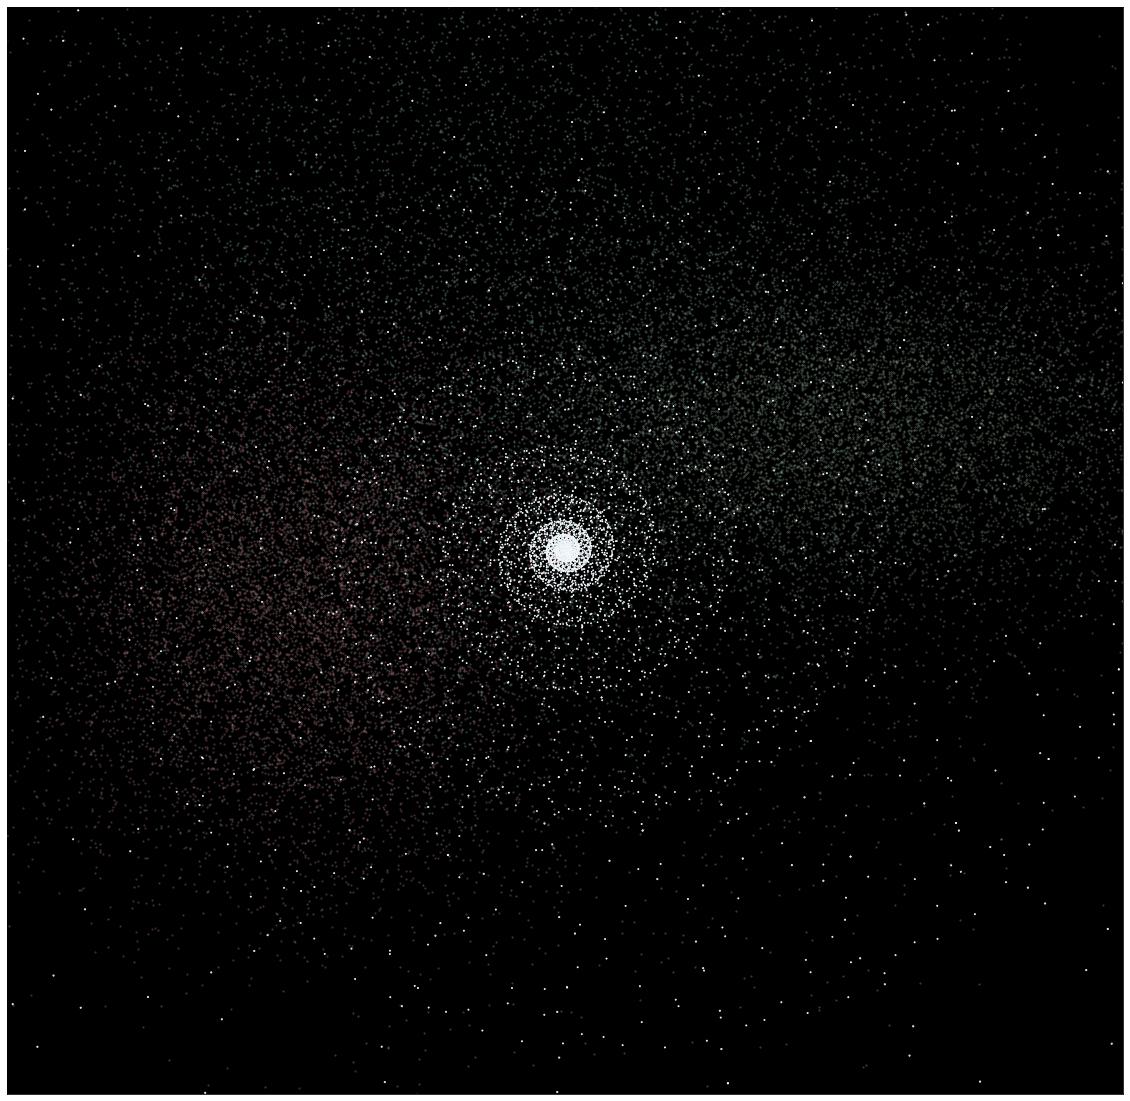

In [19]:
fig

In [19]:
# noise_df_list,noise_color_list = create_noise_func(x_o,y_o,df_pts,**create_noise_params)
def create_gaussian_noise(x_o,y_o,df_pts,range_scale,rng,n_gaussians,cov_mask,clip_ratio,n_samples,colors_list):
    d = max(((df_sc['x']-x_o).abs().max()),((df_sc['y']-y_o).abs().max()))
    
    x_means = rng.uniform(x_o-range_scale*d,x_o+range_scale*d,size=n_gaussians)
    y_means = rng.uniform(y_o-range_scale*d,y_o+range_scale*d,size=n_gaussians)
    df_list = []
    c_list = []
    for i in range(n_gaussians):
        pre_cov_mat = rng.uniform(-d,d,size=(2,2))
        pre_cov_mat = np.where(np.abs(pre_cov_mat)<clip_ratio*d,np.sign(pre_cov_mat)*clip_ratio*d,pre_cov_mat)
        cov_mask = np.array(cov_mask)
        pre_cov_mat = cov_mask*pre_cov_mat
        cov_mat = np.dot(pre_cov_mat,pre_cov_mat.T)
        
        random_array = rng.multivariate_normal(mean=np.array([x_means[i],y_means[i]]),
                                                 cov=cov_mat,
                                                 size=n_samples
                                                )
        df_list.append(pd.DataFrame({'x':random_array[:,0],'y':random_array[:,1]}))
        c_list.append(rng.choice(colors_list))
        
    return df_list,c_list

In [21]:
rng = np.random.default_rng(715128)
gaussian_noise_parameters = {'range_scale':0.5,
                             'rng':rng,
                             'n_gaussians':3,
                             'cov_mask':[[1,0.01],[0.01,1]],
                             'clip_ratio':0.5,
                             'n_samples':10000,
                             'colors_list':list(mcolors.CSS4_COLORS)
                            }
gaussian_plot_parameters = {'s':2,
                            'alpha':0.2
                           }

In [38]:
sc_params_n_1 = {'a':0.01,'k':0.1,'n_ls':100,'rot':10,'r_scale':0.9,'n_c':90}

plot_params_n_1 = {'min_size':3,'max_size':6,'b':-0.8}
gaussian_noise_parameters_1 = {'range_scale':0.5,
                             'rng':rng,
                             'n_gaussians':3,
                             'cov_mask':[[1,0.01],[0.01,1]],
                             'clip_ratio':0.5,
                             'n_samples':10000,
                             'colors_list':list(mcolors.CSS4_COLORS)
                            }
gaussian_plot_parameters_1 = {'s':2,
                            'alpha':0.2
                           }
pics_filenames_n_1 = save_frames(name='spiral_circles_n_1_v2',frames=60,
                                  origin=(0,0),
                                  create_pts_func=create_spiralling_circles,create_pts_params=sc_params_n_1,
                                  plot_params=plot_params_n_1,
                                  create_noise_func=create_gaussian_noise,create_noise_params=gaussian_noise_parameters,
                                  noise_once_flag=True,noise_plot_params=gaussian_plot_parameters
                                 )
create_gif(pics_filenames_n_1,
           frames=60,
           name='spiral_circles_n_1_v2'
          )

rendering frame 1 out of 60
rendering frame 2 out of 60
rendering frame 3 out of 60
rendering frame 4 out of 60
rendering frame 5 out of 60
rendering frame 6 out of 60
rendering frame 7 out of 60
rendering frame 8 out of 60
rendering frame 9 out of 60
rendering frame 10 out of 60
rendering frame 11 out of 60
rendering frame 12 out of 60
rendering frame 13 out of 60
rendering frame 14 out of 60
rendering frame 15 out of 60
rendering frame 16 out of 60
rendering frame 17 out of 60
rendering frame 18 out of 60
rendering frame 19 out of 60
rendering frame 20 out of 60
rendering frame 21 out of 60
rendering frame 22 out of 60
rendering frame 23 out of 60
rendering frame 24 out of 60
rendering frame 25 out of 60
rendering frame 26 out of 60
rendering frame 27 out of 60
rendering frame 28 out of 60
rendering frame 29 out of 60
rendering frame 30 out of 60
rendering frame 31 out of 60
rendering frame 32 out of 60
rendering frame 33 out of 60
rendering frame 34 out of 60
rendering frame 35 out 

In [37]:
sc_params_n_2 = {'a':0.01,'k':0.1,'n_ls':100,'rot':10,'r_scale':1,'n_c':60}
# a=0.01,k=0.1,n_ls=100,rot=10,
#            r_scale=1,n_c=60,
#            max_size=4,b=-0.5,
plot_params_n_2 = {'min_size':2,'max_size':8,'b':-0.8}
gaussian_noise_parameters_2 = {'range_scale':0.5,
                             'rng':rng,
                             'n_gaussians':3,
                             'cov_mask':[[1,0.01],[0.01,1]],
                             'clip_ratio':0.8,
                             'n_samples':10000,
                             'colors_list':list(mcolors.CSS4_COLORS)
                            }
gaussian_plot_parameters_2 = {'s':2,
                            'alpha':0.25
                           }
pics_filenames_n_2 = save_frames(name='spiral_circles_n_2',frames=60,
                                  origin=(0,0),
                                  create_pts_func=create_spiralling_circles,create_pts_params=sc_params_n_2,
                                  plot_params=plot_params_n_2,
                                  create_noise_func=create_gaussian_noise,create_noise_params=gaussian_noise_parameters_2,
                                  noise_once_flag=True,noise_plot_params=gaussian_plot_parameters_2
                                 )
create_gif(pics_filenames_n_2,
           frames=60,
           name='spiral_circles_n_2'
          )

rendering frame 1 out of 60
rendering frame 2 out of 60
rendering frame 3 out of 60
rendering frame 4 out of 60
rendering frame 5 out of 60
rendering frame 6 out of 60
rendering frame 7 out of 60
rendering frame 8 out of 60
rendering frame 9 out of 60
rendering frame 10 out of 60
rendering frame 11 out of 60
rendering frame 12 out of 60
rendering frame 13 out of 60
rendering frame 14 out of 60
rendering frame 15 out of 60
rendering frame 16 out of 60
rendering frame 17 out of 60
rendering frame 18 out of 60
rendering frame 19 out of 60
rendering frame 20 out of 60
rendering frame 21 out of 60
rendering frame 22 out of 60
rendering frame 23 out of 60
rendering frame 24 out of 60
rendering frame 25 out of 60
rendering frame 26 out of 60
rendering frame 27 out of 60
rendering frame 28 out of 60
rendering frame 29 out of 60
rendering frame 30 out of 60
rendering frame 31 out of 60
rendering frame 32 out of 60
rendering frame 33 out of 60
rendering frame 34 out of 60
rendering frame 35 out 

In [33]:
# list(mcolors.CSS4_COLORS)
# by_hsv = sorted((tuple(mcolors.rgb_to_hsv(mcolors.to_rgb(color))),
#                          name)
#                         for name, color in mcolors.CSS4_COLORS.items())
# color_names = [name for hsv, name in by_hsv]
# color_names

In [36]:
sc_params_n_6 = {'a':0.01,'k':0.5,'n_ls':200,'rot':10,'r_scale':0.6,'n_c':30}
# a=0.01,k=0.5,n_ls=200,rot=10,
#            r_scale=0.6,n_c=30,
#            max_size=6,b=-0.5,
plot_params_n_6 = {'min_size':6,'max_size':18,'b':-0.5}
gaussian_noise_parameters_6 = {'range_scale':0.5,
                             'rng':rng,
                             'n_gaussians':4,
                             'cov_mask':[[1,0.01],[0.01,1]],
                             'clip_ratio':0.8,
                             'n_samples':10000,
                             'colors_list':list(mcolors.CSS4_COLORS)
                            }
gaussian_plot_parameters_6 = {'s':2,
                            'alpha':0.25
                           }
pics_filenames_n_6 = save_frames(name='spiral_circles_n_6',frames=60,
                                  origin=(0,0),
                                  create_pts_func=create_spiralling_circles,create_pts_params=sc_params_n_6,
                                  plot_params=plot_params_n_6,
                                  create_noise_func=create_gaussian_noise,create_noise_params=gaussian_noise_parameters_6,
                                  noise_once_flag=True,noise_plot_params=gaussian_plot_parameters_6
                                 )
create_gif(pics_filenames_n_6,
           frames=60,
           name='spiral_circles_n_6'
          )

rendering frame 1 out of 60
rendering frame 2 out of 60
rendering frame 3 out of 60
rendering frame 4 out of 60
rendering frame 5 out of 60
rendering frame 6 out of 60
rendering frame 7 out of 60
rendering frame 8 out of 60
rendering frame 9 out of 60
rendering frame 10 out of 60
rendering frame 11 out of 60
rendering frame 12 out of 60
rendering frame 13 out of 60
rendering frame 14 out of 60
rendering frame 15 out of 60
rendering frame 16 out of 60
rendering frame 17 out of 60
rendering frame 18 out of 60
rendering frame 19 out of 60
rendering frame 20 out of 60
rendering frame 21 out of 60
rendering frame 22 out of 60
rendering frame 23 out of 60
rendering frame 24 out of 60
rendering frame 25 out of 60
rendering frame 26 out of 60
rendering frame 27 out of 60
rendering frame 28 out of 60
rendering frame 29 out of 60
rendering frame 30 out of 60
rendering frame 31 out of 60
rendering frame 32 out of 60
rendering frame 33 out of 60
rendering frame 34 out of 60
rendering frame 35 out 

## Color

TypeError: cubehelix_palette() got an unexpected keyword argument 'ax'

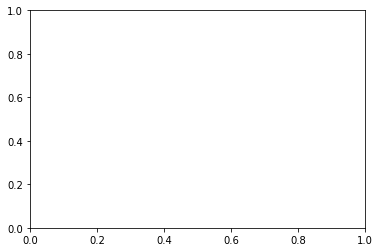

In [45]:
sns.cubehelix_palette(start=2, rot=0, dark=0, light=.95, reverse=True, as_cmap=True)


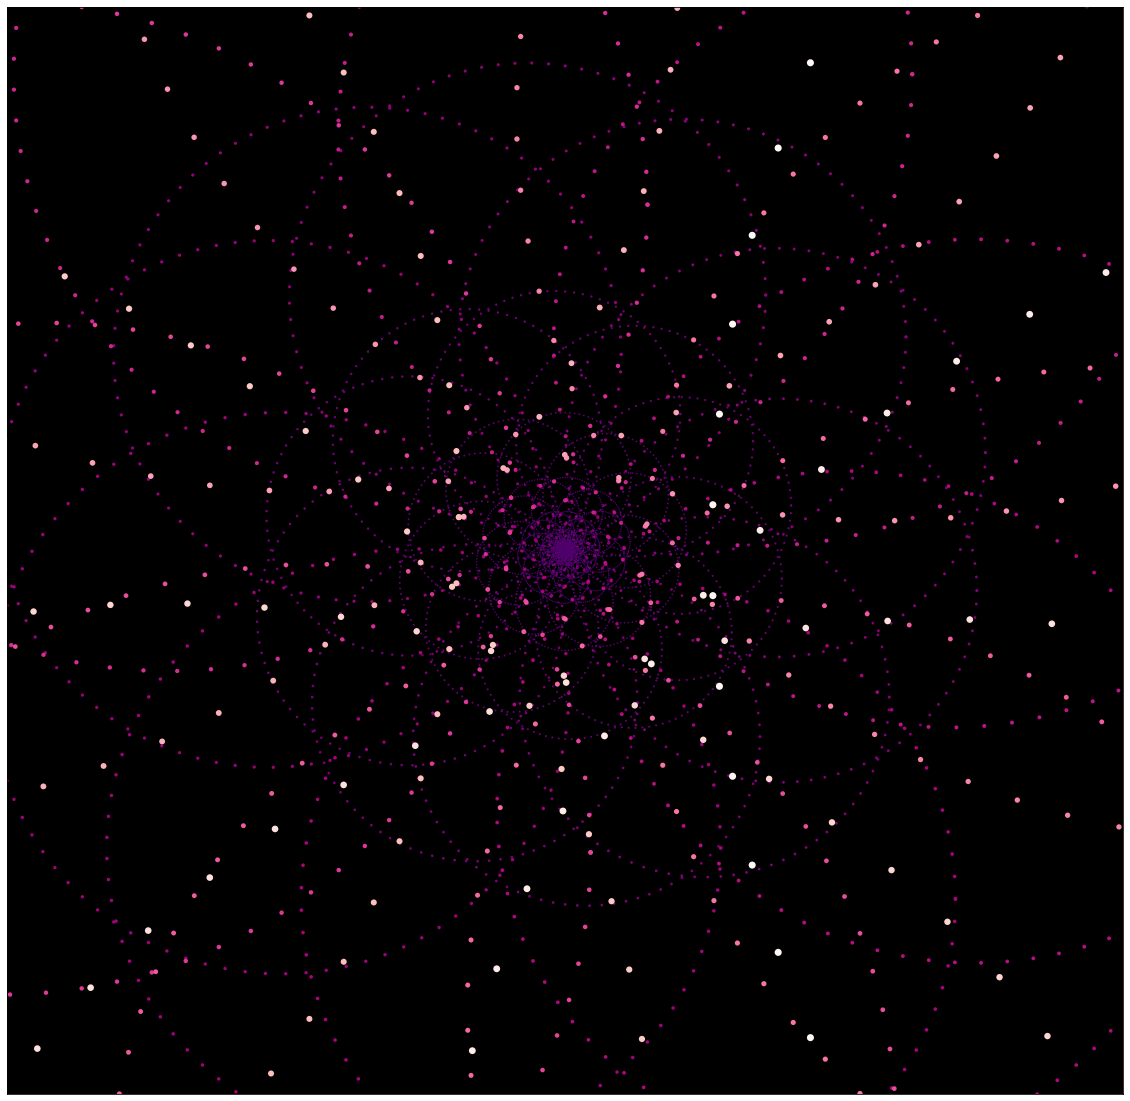

In [20]:
df_sc = create_spiralling_circles(x_o=0,y_o=0,phase=0,
                    a=0.01,k=0.1,n_ls=100,rot=10,
                    r_scale=0.9,n_c=90)
fig,ax = plot_scatter(df_sc,
                             x_o=0,y_o=0,
                             min_size=1,max_size=50,
                    b=-0.8,size='r_c',hue='r_c',palette='RdPu_r')

In [51]:
# pics_filenames = save_sc_frames(x_o,y_o,a,k,n_ls,rot,r_scale,n_c,max_size,b,frames,pics_path)
plot_params_1_clr_rdpu_r = {'min_size':1,'max_size':50,'b':-0.8,'size':'r_c','hue':'r_c','palette':'RdPu_r'}

pics_filenames_1 = save_frames(name='spiral_circles_1_clr_rdpu_r',frames=60,
                                  origin=(0,0),
                                  create_pts_func=create_spiralling_circles,create_pts_params=sc_params_1,
                                  plot_params=plot_params_1_clr_rdpu_r,
                                  create_noise_func=None,create_noise_params=None,
                                  noise_once_flag=True,noise_plot_params=None
                                 )
create_gif(pics_filenames_1,
           frames=60,
           name='spiral_circles_1_clr_rdpu_r'
          )

rendering frame 1 out of 60
rendering frame 2 out of 60
rendering frame 3 out of 60
rendering frame 4 out of 60
rendering frame 5 out of 60
rendering frame 6 out of 60
rendering frame 7 out of 60
rendering frame 8 out of 60
rendering frame 9 out of 60
rendering frame 10 out of 60
rendering frame 11 out of 60
rendering frame 12 out of 60
rendering frame 13 out of 60
rendering frame 14 out of 60
rendering frame 15 out of 60
rendering frame 16 out of 60
rendering frame 17 out of 60
rendering frame 18 out of 60
rendering frame 19 out of 60
rendering frame 20 out of 60
rendering frame 21 out of 60
rendering frame 22 out of 60
rendering frame 23 out of 60
rendering frame 24 out of 60
rendering frame 25 out of 60
rendering frame 26 out of 60
rendering frame 27 out of 60
rendering frame 28 out of 60
rendering frame 29 out of 60
rendering frame 30 out of 60
rendering frame 31 out of 60
rendering frame 32 out of 60
rendering frame 33 out of 60
rendering frame 34 out of 60
rendering frame 35 out 

In [21]:
# pics_filenames = save_sc_frames(x_o,y_o,a,k,n_ls,rot,r_scale,n_c,max_size,b,frames,pics_path)
# x_o=0,y_o=0,
#            a=0.01,k=0.1,n_ls=100,rot=10,
#            r_scale=1,n_c=60,
#            max_size=4,b=-0.5,
sc_params_2 = {'a':0.01,'k':0.1,'n_ls':100,'rot':10,'r_scale':1,'n_c':60}

In [52]:
plot_params_2_clr_rdpu_r = {'min_size':1,'max_size':40,'b':-0.5,'size':'r_c','hue':'r_c','palette':'RdPu_r'}

pics_filenames_2 = save_frames(name='spiral_circles_2_clr_rdpu_r',frames=60,
                                  origin=(0,0),
                                  create_pts_func=create_spiralling_circles,create_pts_params=sc_params_2,
                                  plot_params=plot_params_2_clr_rdpu_r,
                                  create_noise_func=None,create_noise_params=None,
                                  noise_once_flag=True,noise_plot_params=None
                                 )
create_gif(pics_filenames_2,
           frames=60,
           name='spiral_circles_2_clr_rdpu_r'
          )

rendering frame 1 out of 60
rendering frame 2 out of 60
rendering frame 3 out of 60
rendering frame 4 out of 60
rendering frame 5 out of 60
rendering frame 6 out of 60
rendering frame 7 out of 60
rendering frame 8 out of 60
rendering frame 9 out of 60
rendering frame 10 out of 60
rendering frame 11 out of 60
rendering frame 12 out of 60
rendering frame 13 out of 60
rendering frame 14 out of 60
rendering frame 15 out of 60
rendering frame 16 out of 60
rendering frame 17 out of 60
rendering frame 18 out of 60
rendering frame 19 out of 60
rendering frame 20 out of 60
rendering frame 21 out of 60
rendering frame 22 out of 60
rendering frame 23 out of 60
rendering frame 24 out of 60
rendering frame 25 out of 60
rendering frame 26 out of 60
rendering frame 27 out of 60
rendering frame 28 out of 60
rendering frame 29 out of 60
rendering frame 30 out of 60
rendering frame 31 out of 60
rendering frame 32 out of 60
rendering frame 33 out of 60
rendering frame 34 out of 60
rendering frame 35 out 

In [22]:
# pics_filenames = save_sc_frames(x_o,y_o,a,k,n_ls,rot,r_scale,n_c,max_size,b,frames,pics_path)
#            a=0.01,k=0.1,n_ls=100,rot=10,
#            r_scale=1.6,n_c=60,
#            max_size=8,b=-0.5,

sc_params_3 = {'a':0.01,'k':0.1,'n_ls':100,'rot':10,'r_scale':1.6,'n_c':60}

In [169]:
plot_params_3_clr_gist_heat = {'min_size':0,'max_size':60,'b':-0.45,'size':'r_c','hue':'r_c','palette':'gist_heat'}

pics_filenames_3 = save_frames(name='spiral_circles_3_clr_gist_heat',frames=60,
                                  origin=(0,0),
                                  create_pts_func=create_spiralling_circles,create_pts_params=sc_params_3,
                                  plot_params=plot_params_3_clr_gist_heat,
                                  create_noise_func=None,create_noise_params=None,
                                  noise_once_flag=True,noise_plot_params=None
                                 )
create_gif(pics_filenames_3,
           frames=60,
           name='spiral_circles_3_clr_gist_heat'
          )

rendering frame 1 out of 60
rendering frame 2 out of 60
rendering frame 3 out of 60
rendering frame 4 out of 60
rendering frame 5 out of 60
rendering frame 6 out of 60
rendering frame 7 out of 60
rendering frame 8 out of 60
rendering frame 9 out of 60
rendering frame 10 out of 60
rendering frame 11 out of 60
rendering frame 12 out of 60
rendering frame 13 out of 60
rendering frame 14 out of 60
rendering frame 15 out of 60
rendering frame 16 out of 60
rendering frame 17 out of 60
rendering frame 18 out of 60
rendering frame 19 out of 60
rendering frame 20 out of 60
rendering frame 21 out of 60
rendering frame 22 out of 60
rendering frame 23 out of 60
rendering frame 24 out of 60
rendering frame 25 out of 60
rendering frame 26 out of 60
rendering frame 27 out of 60
rendering frame 28 out of 60
rendering frame 29 out of 60
rendering frame 30 out of 60
rendering frame 31 out of 60
rendering frame 32 out of 60
rendering frame 33 out of 60
rendering frame 34 out of 60
rendering frame 35 out 

In [23]:
# pics_filenames = save_sc_frames(x_o,y_o,a,k,n_ls,rot,r_scale,n_c,max_size,b,frames,pics_path)
#            a=0.01,k=0.01,n_ls=200,rot=10,
#            r_scale=1.6,n_c=30,
#            max_size=8,b=-0.5,

sc_params_4 = {'a':0.01,'k':0.01,'n_ls':200,'rot':10,'r_scale':1.6,'n_c':30}

In [180]:
plot_params_4_clr_RdPu_r = {'min_size':1,'max_size':20,'b':-0.5,'size':'r_c','hue':'r_c','palette':'RdPu_r'}

pics_filenames_4 = save_frames(name='spiral_circles_4_clr_RdPu_r',frames=60,
                                  origin=(0,0),
                                  create_pts_func=create_spiralling_circles,create_pts_params=sc_params_4,
                                  plot_params=plot_params_4_clr_RdPu_r,
                                  create_noise_func=None,create_noise_params=None,
                                  noise_once_flag=True,noise_plot_params=None
                                 )
create_gif(pics_filenames_4,
           frames=60,
           name='spiral_circles_4_clr_RdPu_r'
          )

rendering frame 1 out of 60
rendering frame 2 out of 60
rendering frame 3 out of 60
rendering frame 4 out of 60
rendering frame 5 out of 60
rendering frame 6 out of 60
rendering frame 7 out of 60
rendering frame 8 out of 60
rendering frame 9 out of 60
rendering frame 10 out of 60
rendering frame 11 out of 60
rendering frame 12 out of 60
rendering frame 13 out of 60
rendering frame 14 out of 60
rendering frame 15 out of 60
rendering frame 16 out of 60
rendering frame 17 out of 60
rendering frame 18 out of 60
rendering frame 19 out of 60
rendering frame 20 out of 60
rendering frame 21 out of 60
rendering frame 22 out of 60
rendering frame 23 out of 60
rendering frame 24 out of 60
rendering frame 25 out of 60
rendering frame 26 out of 60
rendering frame 27 out of 60
rendering frame 28 out of 60
rendering frame 29 out of 60
rendering frame 30 out of 60
rendering frame 31 out of 60
rendering frame 32 out of 60
rendering frame 33 out of 60
rendering frame 34 out of 60
rendering frame 35 out 

In [24]:
#            a=0.01,k=0.5,n_ls=200,rot=10,
#            r_scale=0.6,n_c=30,
#            max_size=6,b=-0.5,
sc_params_6 = {'a':0.01,'k':0.5,'n_ls':200,'rot':10,'r_scale':0.6,'n_c':30}

In [118]:
# pics_filenames = save_sc_frames(x_o,y_o,a,k,n_ls,rot,r_scale,n_c,max_size,b,frames,pics_path)
plot_params_1_clr_rdpu_r_rot = {'min_size':1,'max_size':50,'b':-0.8,'size':'rot_angle','hue':'r_c','palette':'RdPu_r'}

pics_filenames_1 = save_frames(name='spiral_circles_1_clr_rdpu_r_rot',frames=60,
                                  origin=(0,0),
                                  create_pts_func=create_spiralling_circles,create_pts_params=sc_params_1,
                                  plot_params=plot_params_1_clr_rdpu_r_rot,
                                  create_noise_func=None,create_noise_params=None,
                                  noise_once_flag=True,noise_plot_params=None
                                 )
create_gif(pics_filenames_1,
           frames=60,
           name='spiral_circles_1_clr_rdpu_r_rot'
          )

rendering frame 1 out of 60
rendering frame 2 out of 60
rendering frame 3 out of 60
rendering frame 4 out of 60
rendering frame 5 out of 60
rendering frame 6 out of 60
rendering frame 7 out of 60
rendering frame 8 out of 60
rendering frame 9 out of 60
rendering frame 10 out of 60
rendering frame 11 out of 60
rendering frame 12 out of 60
rendering frame 13 out of 60
rendering frame 14 out of 60
rendering frame 15 out of 60
rendering frame 16 out of 60
rendering frame 17 out of 60
rendering frame 18 out of 60
rendering frame 19 out of 60
rendering frame 20 out of 60
rendering frame 21 out of 60
rendering frame 22 out of 60
rendering frame 23 out of 60
rendering frame 24 out of 60
rendering frame 25 out of 60
rendering frame 26 out of 60
rendering frame 27 out of 60
rendering frame 28 out of 60
rendering frame 29 out of 60
rendering frame 30 out of 60
rendering frame 31 out of 60
rendering frame 32 out of 60
rendering frame 33 out of 60
rendering frame 34 out of 60
rendering frame 35 out 

In [178]:
# pics_filenames = save_sc_frames(x_o,y_o,a,k,n_ls,rot,r_scale,n_c,max_size,b,frames,pics_path)
plot_params_3_clr_gist_heat_rot = {'min_size':5,'max_size':60,'b':-0.5,'size':'rot_angle','hue':'r_c','palette':'gist_heat'}

pics_filenames_3 = save_frames(name='spiral_circles_3_clr_gist_heat_rot',frames=60,
                                  origin=(0,0),
                                  create_pts_func=create_spiralling_circles,create_pts_params=sc_params_3,
                                  plot_params=plot_params_3_clr_gist_heat_rot,
                                  create_noise_func=None,create_noise_params=None,
                                  noise_once_flag=True,noise_plot_params=None
                                 )
create_gif(pics_filenames_3,
           frames=60,
           name='spiral_circles_3_clr_gist_heat_rot'
          )

rendering frame 1 out of 60
rendering frame 2 out of 60
rendering frame 3 out of 60
rendering frame 4 out of 60
rendering frame 5 out of 60
rendering frame 6 out of 60
rendering frame 7 out of 60
rendering frame 8 out of 60
rendering frame 9 out of 60
rendering frame 10 out of 60
rendering frame 11 out of 60
rendering frame 12 out of 60
rendering frame 13 out of 60
rendering frame 14 out of 60
rendering frame 15 out of 60
rendering frame 16 out of 60
rendering frame 17 out of 60
rendering frame 18 out of 60
rendering frame 19 out of 60
rendering frame 20 out of 60
rendering frame 21 out of 60
rendering frame 22 out of 60
rendering frame 23 out of 60
rendering frame 24 out of 60
rendering frame 25 out of 60
rendering frame 26 out of 60
rendering frame 27 out of 60
rendering frame 28 out of 60
rendering frame 29 out of 60
rendering frame 30 out of 60
rendering frame 31 out of 60
rendering frame 32 out of 60
rendering frame 33 out of 60
rendering frame 34 out of 60
rendering frame 35 out 

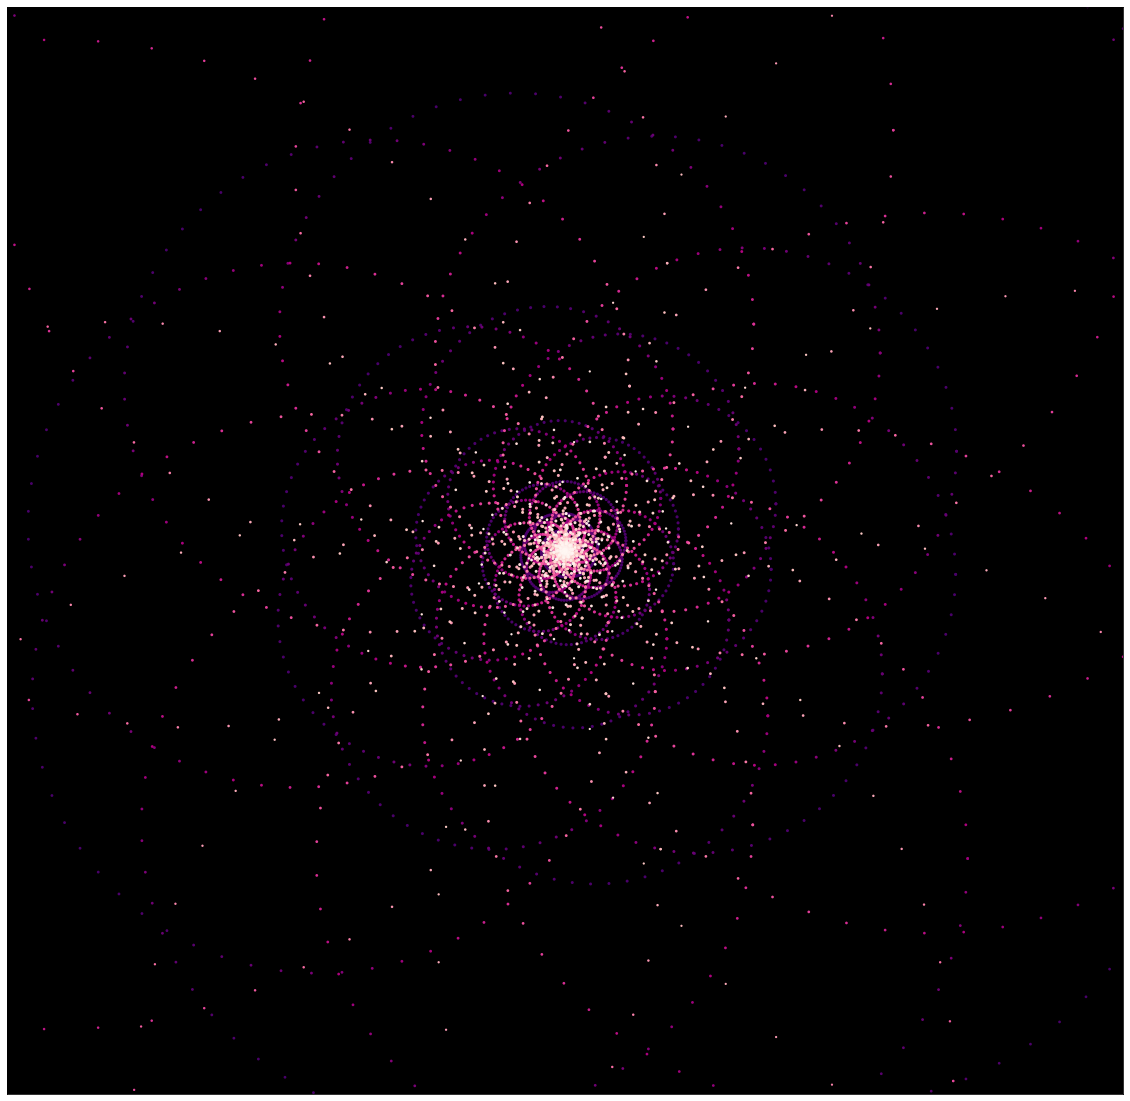

In [207]:
df_sc = create_spiralling_circles(x_o=0,y_o=0,phase=0,
                    **sc_params_2)
fig,ax = plot_scatter(df_sc,
                             x_o=0,y_o=0,
                             min_size=10,max_size=5,
                    b=-0.6,size='r_c',hue='rot_angle',palette='RdPu_r')

In [27]:
# pics_filenames = save_sc_frames(x_o,y_o,a,k,n_ls,rot,r_scale,n_c,max_size,b,frames,pics_path)
plot_params_2_clr_RdPu_r_rot_2 = {'min_size':10,'max_size':5,'b':-0.6,'size':'r_c','hue':'rot_angle','palette':'RdPu_r'}

pics_filenames_2 = save_frames(name='spiral_circles_2_clr_RdPu_r_rot_2',frames=60,
                                  origin=(0,0),
                                  create_pts_func=create_spiralling_circles,create_pts_params=sc_params_2,
                                  plot_params=plot_params_2_clr_RdPu_r_rot_2_1,
                                  create_noise_func=None,create_noise_params=None,
                                  noise_once_flag=True,noise_plot_params=None
                                 )
create_gif(pics_filenames_2,
           frames=60,
           name='spiral_circles_2_clr_RdPu_r_rot_2'
          )

rendering frame 1 out of 60
rendering frame 2 out of 60
rendering frame 3 out of 60
rendering frame 4 out of 60
rendering frame 5 out of 60
rendering frame 6 out of 60
rendering frame 7 out of 60
rendering frame 8 out of 60
rendering frame 9 out of 60
rendering frame 10 out of 60
rendering frame 11 out of 60
rendering frame 12 out of 60
rendering frame 13 out of 60
rendering frame 14 out of 60
rendering frame 15 out of 60
rendering frame 16 out of 60
rendering frame 17 out of 60
rendering frame 18 out of 60
rendering frame 19 out of 60
rendering frame 20 out of 60
rendering frame 21 out of 60
rendering frame 22 out of 60
rendering frame 23 out of 60
rendering frame 24 out of 60
rendering frame 25 out of 60
rendering frame 26 out of 60
rendering frame 27 out of 60
rendering frame 28 out of 60
rendering frame 29 out of 60
rendering frame 30 out of 60
rendering frame 31 out of 60
rendering frame 32 out of 60
rendering frame 33 out of 60
rendering frame 34 out of 60
rendering frame 35 out 